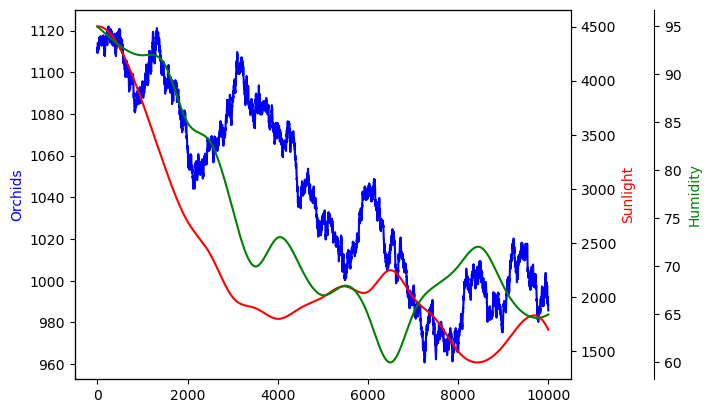

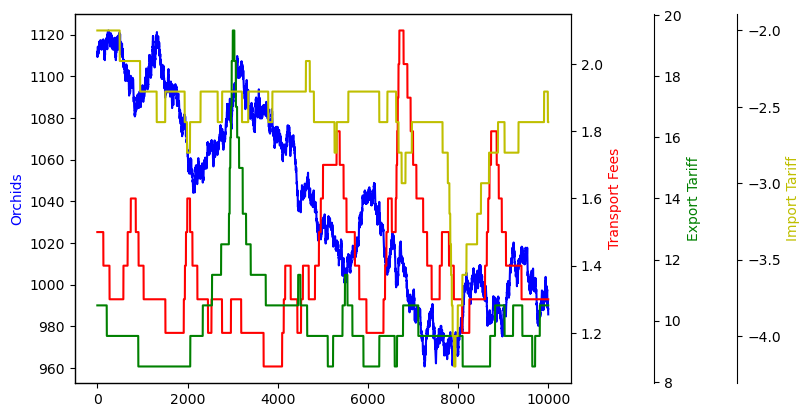

In [115]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('../data/round2/0.csv', delimiter=';')
l = 1
df = df.loc[:len(df) // (1 / l)]
df.head()


fig, ax1 = plt.subplots()

# Plot and label the primary y-axis
ax1.plot(df['ORCHIDS'], color='b')
ax1.set_ylabel('Orchids', color='b')

# Create the first secondary y-axis and plot
ax2 = ax1.twinx()
ax2.plot(df['SUNLIGHT'], color='r')
ax2.set_ylabel('Sunlight', color='r')

# Create a second secondary y-axis, plot, and shift it to the left
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Shift the third y-axis further right
ax3.plot(df['HUMIDITY'], color='g')
ax3.set_ylabel('Humidity', color='g')

plt.show()

fig, ax1 = plt.subplots()

# Primary y-axis
ax1.plot(df['ORCHIDS'], color='b', label='Orchids')
ax1.set_ylabel('Orchids', color='b')
# ax1.legend(loc='upper left')

# First secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df['TRANSPORT_FEES'], color='r', label='Transport Fees')
ax2.set_ylabel('Transport Fees', color='r')
# ax2.legend(loc='upper right')

# Second secondary y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Shift it outward
ax3.plot(df['EXPORT_TARIFF'], color='g', label='Export Tariff')
ax3.set_ylabel('Export Tariff', color='g')
# ax3.legend(loc='lower right')

# Third secondary y-axis
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # Further shift it outward
ax4.plot(df['IMPORT_TARIFF'], color='y', label='Import Tariff')
ax4.set_ylabel('Import Tariff', color='y')
# ax4.legend(loc='lower left')

plt.show()


In [128]:
# df[['ORCHIDS']]
df[['SUNLIGHT', 'HUMIDITY']][:-1]

,SUNLIGHT,HUMIDITY
0,4500.0000,95.000000
1,4500.0356,94.995990
2,4500.0700,94.991980
3,4500.1016,94.987970
4,4500.1313,94.983950
...,...,...
9995,1704.4551,64.986400
9996,1703.5710,64.989100
9997,1702.6835,64.991806
9998,1701.7925,64.994530


In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
model = LinearRegression()


# model = MLPRegressor(hidden_layer_sizes=(12,24,24,12), verbose=True,  random_state=1, max_iter=500)
# shift = 5
res = []
score = []
for shift in range(1, 100):
    X1 = df[['SUNLIGHT', 'HUMIDITY']][:-shift]
    X2 = (df['SUNLIGHT'] * df['HUMIDITY'])[:-shift]
    X3 = (df['SUNLIGHT'] ** 2)[:-shift]
    X4 = (df['HUMIDITY'] ** 2)[:-shift]
    X6 = df['ORCHIDS'][:-shift]

    X5 = np.maximum(abs(df['HUMIDITY'] - 80), abs(df['HUMIDITY'] - 60))[:-shift]

    X = pd.concat([X1, X2, X5, X6], axis=1)
    # X = X1
    # print(df)
    Y = df['ORCHIDS'].to_numpy()[shift:]
    model = model.fit(X.to_numpy(), Y)
    res.append(model.coef_[-1])
    score.append(model.score(X.to_numpy(), Y))
# model.score(X.to_numpy(), Y)
# model.score(X.to_numpy(), Y)

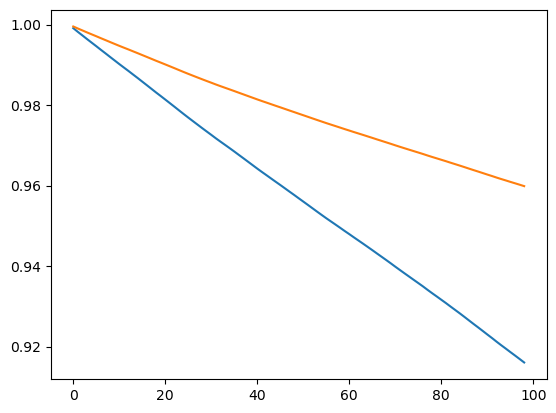

In [162]:
plt.plot(res)
plt.plot(score)

In [151]:
model.coef_

array([ 4.76740928e-04,  3.50068115e-02, -4.55433437e-06, -2.02077447e-02,
        9.95493602e-01])

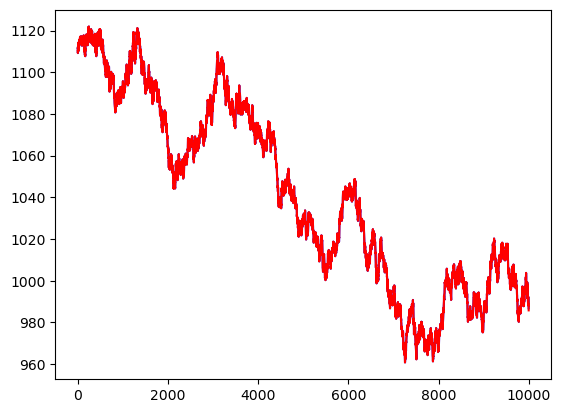

In [143]:
plt.plot(model.predict(X.to_numpy()) , color='b')
# Xi =  (df['ORCHIDS']) - df['ORCHIDS'].mean()
plt.plot(Y, color='r')

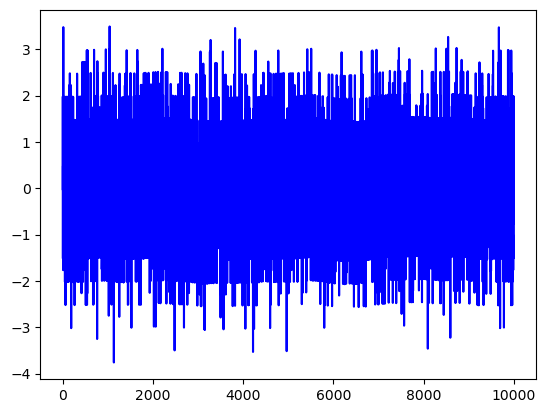

In [144]:

plt.plot(model.predict(X.to_numpy()) -Y, color='b')

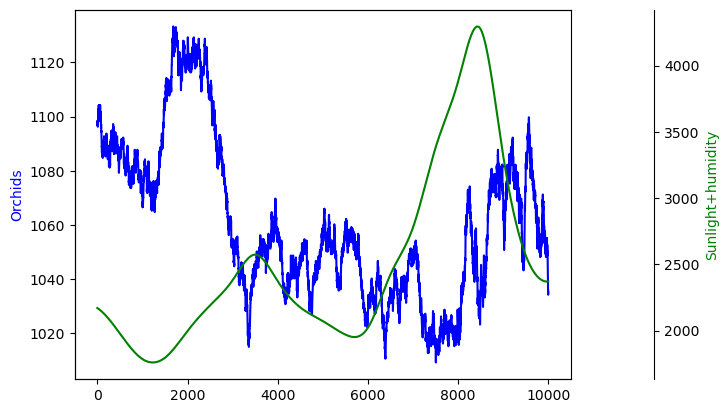

In [24]:
fig, ax1 = plt.subplots()

# Plot and label the primary y-axis
ax1.plot(df['ORCHIDS'], color='b')
ax1.set_ylabel('Orchids', color='b')


# Create a second secondary y-axis, plot, and shift it to the left
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Shift the third y-axis further right
ax3.plot(df['HUMIDITY']+ df['SUNLIGHT'], color='g')
ax3.set_ylabel('Sunlight+humidity', color='g')

plt.show()

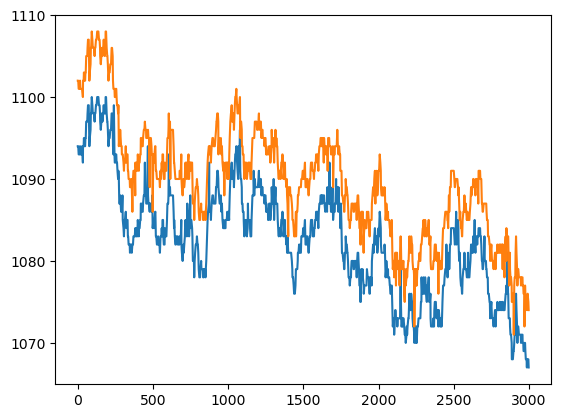

In [18]:
df_price = pd.read_csv('../data/round2/2.csv', delimiter=';')
df_price = df_price[df_price['product'] == 'ORCHIDS']
# df['total_ask'] = df['ask_price_1'] + df['']
plt.plot(df_price['bid_price_1'])
plt.plot(df_price['ask_price_1'])

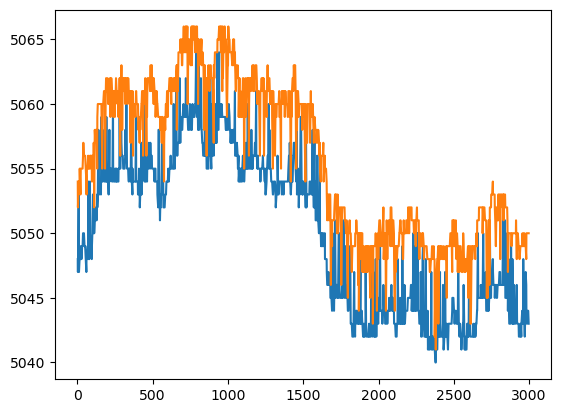

In [16]:

df_price = pd.read_csv('../data/round2/2.csv', delimiter=';')
df_price = df_price[df_price['product'] == 'STARFRUIT']
plt.plot(df_price['bid_price_1'])
plt.plot(df_price['ask_price_1'])

In [9]:
df.head()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1111.75,1.5,10.5,-2.0,4500.0000,95.00000,0
1,100,1111.75,1.5,10.5,-2.0,4500.0356,94.99599,0
2,200,1109.75,1.5,10.5,-2.0,4500.0700,94.99198,0
3,300,1109.25,1.5,10.5,-2.0,4500.1016,94.98797,0
4,400,1110.75,1.5,10.5,-2.0,4500.1313,94.98395,0


# Info
Sunlight < 7 hours -> prod 4% for every 10 minutes


60 < Humidity < 80 -> prod 2% for every 5% points